In [158]:
import numpy as np
import pandas as pd

### Loading Dataset 

In [180]:
ds = pd.read_csv('I:\Text Datasets\CSV\patient.csv')

### Replacing Null Values with 0 

In [181]:
ds=ds.replace(np.NaN,0)

In [182]:
ds.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,0.0,0,visit to Wuhan,1.0,0.0,45.0,1/20/2020,2/6/2020,0,released
1,2,male,1964.0,Korea,filtered at airport,0.0,0,visit to Wuhan,1.0,0.0,75.0,1/24/2020,2/5/2020,0,released
2,3,male,1966.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,16.0,1/26/2020,2/12/2020,0,released
3,4,male,1964.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,95.0,1/27/2020,2/9/2020,0,released
4,5,male,1987.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,31.0,1/30/2020,3/2/2020,0,released


### Setting up Datetime 

In [183]:
ds['confirm_date']=pd.to_datetime(ds.confirmed_date)
ds['release_date']=pd.to_datetime(ds.released_date)

In [184]:
ds.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,confirm_date,release_date
0,1,female,1984.0,China,filtered at airport,0.0,0,visit to Wuhan,1.0,0.0,45.0,1/20/2020,2/6/2020,0,released,2020-01-20,2020-02-06
1,2,male,1964.0,Korea,filtered at airport,0.0,0,visit to Wuhan,1.0,0.0,75.0,1/24/2020,2/5/2020,0,released,2020-01-24,2020-02-05
2,3,male,1966.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,16.0,1/26/2020,2/12/2020,0,released,2020-01-26,2020-02-12
3,4,male,1964.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,95.0,1/27/2020,2/9/2020,0,released,2020-01-27,2020-02-09
4,5,male,1987.0,Korea,capital area,0.0,0,visit to Wuhan,1.0,0.0,31.0,1/30/2020,3/2/2020,0,released,2020-01-30,2020-03-02


### Checking Correlation for filtring Data Columns 

In [186]:
ds.corr()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
patient_id,1.000000,-0.395314,-0.054296,-0.012568,-0.058957,-0.047572
birth_year,-0.395314,1.000000,0.194112,0.075238,0.179177,0.096792
disease,-0.054296,0.194112,1.000000,-0.001371,-0.003257,-0.001764
infection_order,-0.012568,0.075238,-0.001371,1.000000,0.004235,0.084149
infected_by,-0.058957,0.179177,-0.003257,0.004235,1.000000,0.012242
contact_number,-0.047572,0.096792,-0.001764,0.084149,0.012242,1.000000


### Reving Irrelevent Columns 

In [187]:
ds.drop(['group','confirmed_date','released_date','deceased_date','patient_id','infection_order','infected_by'],axis=1,inplace=True)

### Calculating Age 

In [188]:
ds['age']=ds.confirm_date.dt.year-ds.birth_year

### Gender Patient Rate
 -  Checking here which gender has more patient
 -  filtering data with 2020 because this is not a real values

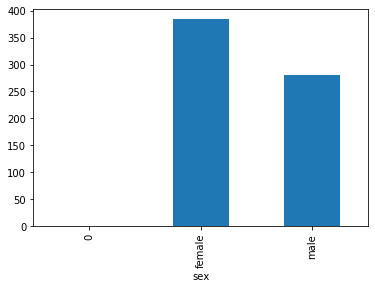

In [189]:
ds[ds.age!=2020].groupby('sex').size().plot(kind='bar')

### Top 10 Patient Age Rate  

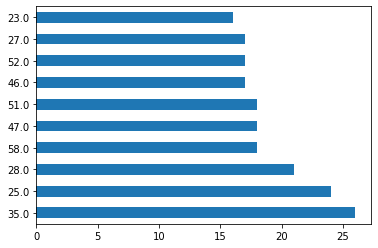

In [190]:
ds[ds.age!=2020].age.value_counts().nlargest(10).plot(kind='barh')

### Checking Country with Sex Rate 
 -  Which Country has more patient with Gender

In [192]:
ds[ds.age!=2020].groupby(['country','sex']).size()

country   sex   
China     female      6
          male        2
Korea     0           1
          female    378
          male      278
Mongolia  male        1
dtype: int64

### Comparing Patient Rate Country,Gender with Age 
 - How much Patient on the base of country , gender and age

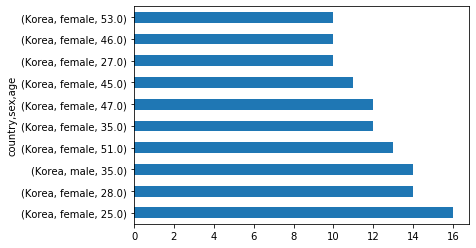

In [197]:
ds[ds.age!=2020].groupby(['country','sex']).age.value_counts().nlargest(10).plot(kind='barh')

###  Confirmed Patient Cause

In [194]:
ds[ds.infection_reason!=0].groupby(['infection_reason']).size()

infection_reason
contact with patient                 76
contact with patient in Daegu         1
contact with patient in Japan         1
contact with patient in Singapore     2
pilgrimage to Israel                  6
residence in Wuhan                    2
visit to China                        2
visit to Daegu                       50
visit to Italy                        1
visit to Japan                        1
visit to Thailand                     2
visit to Vietnam                      1
visit to Wuhan                        8
visit to ooo                          1
dtype: int64